In [1]:
# imports
import ipdb, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Compare context lenghts

In [34]:
# path_to_latex = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/pwc_latex_5_10_10000_clone/twofoldwithunk"
path_to_latex = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/PWC_latex_5_10_10000/twofoldwithunk"
# path_to_published = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_150_5_10_10000/10Neg10000unk/twofoldwithunk"
path_to_published = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_full_5_10_10000/10Neg10000unk/twofoldwithunk"

In [35]:
fold = "fold2"
train_latex_pd = pd.read_csv(f"{path_to_latex}/{fold}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_latex_pd = pd.read_csv(f"{path_to_latex}/{fold}/dev.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

# train_latex_pd = pd.read_csv(f"{path_to_latex}/{fold}/train_old.tsv", 
#                     sep="\t", names=["label", "title", "TDM", "Context"])

# dev_latex_pd = pd.read_csv(f"{path_to_latex}/{fold}/dev_old.tsv", 
#                     sep="\t", names=["label", "title", "TDM", "Context"])


train_published_pd = pd.read_csv(f"{path_to_published}/{fold}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_published_pd = pd.read_csv(f"{path_to_published}/{fold}/dev.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

In [36]:
# train_latex_pd.tail()

In [37]:
train_published_pd.tail()

,label,title,TDM,Context
52310,False,1307.0414v1.pdf,Named Entity Recognition; GENIA; F1,Challenges in Representation Learning: A repor...
52311,False,1307.0414v1.pdf,3D Human Pose Estimation; 3DPW; acceleration e...,Challenges in Representation Learning: A repor...
52312,False,1307.0414v1.pdf,Node Classification; Facebook; Accuracy,Challenges in Representation Learning: A repor...
52313,False,1307.0414v1.pdf,Image Super-Resolution; Set5 - 4x upscaling; PSNR,Challenges in Representation Learning: A repor...
52314,False,1307.0414v1.pdf,summarization; CNN / Daily Mail (Non-anonymize...,Challenges in Representation Learning: A repor...


In [38]:
# train_latex_pd["Len_Context"] = train_latex_pd.Context.apply(lambda x: len(x.split()))
# train_latex_pd = train_latex_pd[train_latex_pd.Len_Context >= 100].drop("Len_Context", axis=1)

# dev_latex_pd["Len_Context"] = dev_latex_pd.Context.apply(lambda x: len(x.split()))
# dev_latex_pd = dev_latex_pd[dev_latex_pd.Len_Context >= 100].drop("Len_Context", axis=1)

# for paper in train_latex_pd.title.unique():
#     train_published_pd[train_published_pd.title==paper]


In [39]:
print(f"Number of Paper in the Train set used in ICADL paper : {len(train_published_pd[train_published_pd.label==True].title.unique())}")
print(f"Number of Paper in the Dev set used in ICADL paper : {len(dev_published_pd[dev_published_pd.label==True].title.unique())}")

print("################################################################")

print(f"Number of Paper in the Train set with Latex source code : {len(train_latex_pd[train_latex_pd.label==True].title.unique())}")
print(f"Number of Paper in the Dev set with Latex source code : {len(dev_latex_pd[dev_latex_pd.label==True].title.unique())}")

Number of Paper in the Train set used in ICADL paper : 3753
Number of Paper in the Dev set used in ICADL paper : 1608
################################################################
Number of Paper in the Train set with Latex source code : 2942
Number of Paper in the Dev set with Latex source code : 1267


In [40]:
3753+1608

5361

In [41]:
2942+1267

4209

In [42]:
# List of pdf name that are in the train file
list_train_latex_pd_uniq = list(train_latex_pd.title.unique())
len(list_train_latex_pd_uniq)

2942

In [43]:
# List of pdf name that are in the test file
list_dev_latex_pd_uniq = list(dev_latex_pd.title.unique())
len(list_dev_latex_pd_uniq)

1267

In [44]:
# List of pdf name that are in the train file
list_train_published_pd_uniq = list(train_published_pd.title.unique())
len(list_train_published_pd_uniq)

3753

In [45]:
# List of pdf name that are in the train file
list_dev_published_pd_uniq = list(dev_published_pd.title.unique())
len(list_dev_published_pd_uniq)

1608

In [46]:
# Dict to contains new context
dict_latex_paper_context = {}
for paper in list_train_latex_pd_uniq:
    dict_latex_paper_context[paper] = train_latex_pd[train_latex_pd.title == paper].Context.values[0]
for paper in list_dev_latex_pd_uniq:
    dict_latex_paper_context[paper] = dev_latex_pd[dev_latex_pd.title == paper].Context.values[0]
    
dict_published_paper_context = {}
for paper in list_train_published_pd_uniq:
    dict_published_paper_context[paper] = train_published_pd[train_published_pd.title == paper].Context.values[0]
for paper in list_dev_published_pd_uniq:
    dict_published_paper_context[paper] = dev_published_pd[dev_published_pd.title == paper].Context.values[0]

In [47]:
def get_start_lenght(dictionary, limit="150", title="", savefig=False):
    # Stats
    len_context = []
    short_context = 0
    paper_to_short_context = {}
    
    for paper, context in dictionary.items():
        len_context.append(len(context.split()))
        if len(context.split()) <= 100 :
            short_context += 1
            paper_to_short_context[paper] = len(context.split()) 
    
    print(f"Context TDM limit {limit}:")
    print(f"Mean lenght: {np.mean(len_context)}")
    print(f"Max lenght: {np.max(len_context)}")
    print(f"Min lenght: {np.min(len_context)}")
    print(f"Std lenght: {np.std(len_context)}")
    print(f"Lenght paper with context less than 10: {len(paper_to_short_context)}")
    
    x = np.arange(1, len(len_context)+1, 1)
    y = len_context

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel("number of papers")
    plt.ylabel("lenght DocTAET")
    if savefig:
        plt.savefig(fname=re.sub(r"[0-9]+", '', title).strip())
    plt.show()
    
    return paper_to_short_context

Context TDM limit 512:
Mean lenght: 504.3794068270845
Max lenght: 2686
Min lenght: 5
Std lenght: 265.50071944364134
Lenght paper with context less than 10: 12


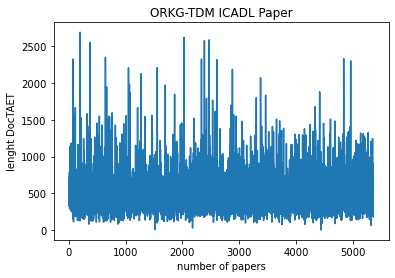

In [48]:
len_published = get_start_lenght(dict_published_paper_context, 
                               limit="512",
                                   title="ORKG-TDM ICADL Paper", savefig=False)

Context TDM limit None:
Mean lenght: 685.2520788785935
Max lenght: 7374
Min lenght: 100
Std lenght: 442.4167283742035
Lenght paper with context less than 10: 2


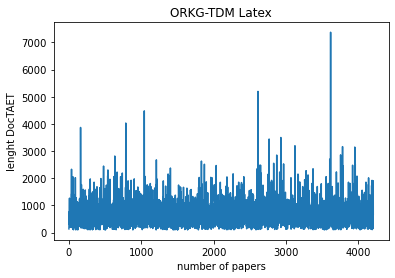

In [49]:
len_latex = get_start_lenght(dict_latex_paper_context, 
                               limit="None",
                                   title="ORKG-TDM Latex", savefig=False)

In [49]:
len_published

{'1504.04666v1.pdf': 84,
 '2010.07290v1.pdf': 84,
 '1711.07361v1.pdf': 10,
 '1703.05165v2.pdf': 31,
 '2102.04308v1.pdf': 100,
 '1608.02644v2.pdf': 98,
 '1307.0414v1.pdf': 78,
 'S18-1146.pdf': 81,
 '2102.04680v1.pdf': 5,
 'S16-1186.pdf': 93,
 '2102.01120v1.pdf': 91,
 '1709.07809v1.pdf': 66}

In [50]:
len_latex

{'1911.04211v4.pdf': 100, '1603.07771v3.pdf': 100}

In [51]:
# train_latex_pd.to_csv(path_or_buf=f"{path_to_latex}/{fold}/train_.tsv", 
#                  sep="\t", header=None, index=False)

# dev_latex_pd.to_csv(path_or_buf=f"{path_to_latex}/{fold}/dev_.tsv", 
#                  sep="\t", header=None, index=False)

In [52]:
# # paper = '1505.07110v2.pdf'
# paper = "1605.06211v1.pdf"
# # paper = '1508.01819v1.pdf'
# dict_latex_paper_context[paper]

In [53]:
# dict_published_paper_context["1301.3592v6.pdf"]

In [54]:
# train_published_pd["Context"] = train_published_pd.apply(lambda x : dict_published_paper_context[x['title']] if x['title'] in dict_latex_paper_context.keys() else "None", axis=1)
# train_published_pd.drop(train_published_pd.index[train_published_pd['Context'] == 'None'], inplace = True)
# train_published_pd.reset_index(drop=True, inplace=True)
# dev_published_pd["Context"] = dev_published_pd.apply(lambda x : dict_published_paper_context[x['title']] if x['title'] in dict_latex_paper_context.keys() else "None", axis=1)
# dev_published_pd.drop(dev_published_pd.index[dev_published_pd['Context'] == 'None'], inplace = True)
# dev_published_pd.reset_index(drop=True, inplace=True)

train_latex_pd["Context"] = train_latex_pd.apply(lambda x : dict_published_paper_context[x['title']], axis=1)
dev_latex_pd["Context"] = dev_latex_pd.apply(lambda x : dict_published_paper_context[x['title']], axis=1)

In [55]:
train_latex_pd.tail()

,label,title,TDM,Context
41137,False,1909.09051v1.pdf,Semi-Supervised Video Object Segmentation; You...,Self-Supervised Monocular Depth Hints Monocula...
41138,False,1909.09051v1.pdf,Image Clustering; STL-10; Backbone,Self-Supervised Monocular Depth Hints Monocula...
41139,False,1909.09051v1.pdf,"Semi-Supervised Image Classification; SVHN, 10...",Self-Supervised Monocular Depth Hints Monocula...
41140,False,1909.09051v1.pdf,RGB-D Salient Object Detection; NJU2K; Average...,Self-Supervised Monocular Depth Hints Monocula...
41141,False,1909.09051v1.pdf,Question Answering; SQuAD2.0 dev; EM,Self-Supervised Monocular Depth Hints Monocula...


In [56]:
train_published_pd.tail()

,label,title,TDM,Context
50202,False,1307.0414v1.pdf,Named Entity Recognition; GENIA; F1,Challenges in Representation Learning: A repor...
50203,False,1307.0414v1.pdf,3D Human Pose Estimation; 3DPW; acceleration e...,Challenges in Representation Learning: A repor...
50204,False,1307.0414v1.pdf,Node Classification; Facebook; Accuracy,Challenges in Representation Learning: A repor...
50205,False,1307.0414v1.pdf,Image Super-Resolution; Set5 - 4x upscaling; PSNR,Challenges in Representation Learning: A repor...
50206,False,1307.0414v1.pdf,summarization; CNN / Daily Mail (Non-anonymize...,Challenges in Representation Learning: A repor...


In [57]:
# List of pdf name that are in the test file
list_train_latex_pd_uniq = list(train_latex_pd.title.unique())
len(list_train_latex_pd_uniq)

2942

In [58]:
# List of pdf name that are in the train file
list_dev_latex_pd_uniq = list(dev_latex_pd.title.unique())
len(list_dev_latex_pd_uniq)

1267

In [59]:
# List of pdf name that are in the train file
list_train_published_pd_uniq = list(train_published_pd.title.unique())
len(list_train_published_pd_uniq)

3753

In [60]:
# List of pdf name that are in the train file
list_dev_published_pd_uniq = list(dev_published_pd.title.unique())
len(list_dev_published_pd_uniq)

1608

In [61]:
count = 0
for paper in list_dev_latex_pd_uniq:
    if paper not in list_train_published_pd_uniq and paper not in list_dev_published_pd_uniq :
        # print(paper)
        count += 1
count

0

In [62]:
# dict_published_paper_context = {}
# for paper in list_train_latex_pd_uniq:
#     dict_published_paper_context[paper]=train_latex_pd[train_latex_pd.title==paper].Context.values[0]
# for paper in list_dev_latex_pd_uniq:
#     dict_published_paper_context[paper]=dev_latex_pd[dev_latex_pd.title==paper].Context.values[0]

# Dict to contains new context
dict_latex_paper_context = {}
for paper in list_train_latex_pd_uniq:
    dict_latex_paper_context[paper] = train_latex_pd[train_latex_pd.title == paper].Context.values[0]
for paper in list_dev_latex_pd_uniq:
    dict_latex_paper_context[paper] = dev_latex_pd[dev_latex_pd.title == paper].Context.values[0]
    
dict_published_paper_context = {}
for paper in list_train_published_pd_uniq:
    dict_published_paper_context[paper] = train_published_pd[train_published_pd.title == paper].Context.values[0]
for paper in list_dev_published_pd_uniq:
    dict_published_paper_context[paper] = dev_published_pd[dev_published_pd.title == paper].Context.values[0]

Context TDM limit None:
Mean lenght: 378.88919977616115
Max lenght: 2161
Min lenght: 5
Std lenght: 119.6318828220644
Lenght paper with context less than 10: 12


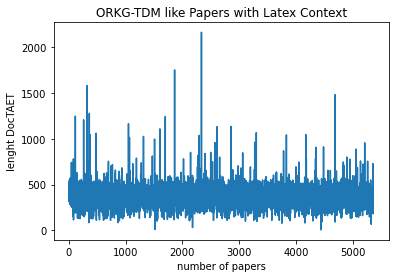

In [63]:
len_context_150 = get_start_lenght(dict_published_paper_context, 
                                   limit="None", 
                                   title="ORKG-TDM like Papers with Latex Context",
                                  savefig=False)

Context TDM limit None:
Mean lenght: 385.37633642195294
Max lenght: 2161
Min lenght: 101
Std lenght: 118.75935434325383
Lenght paper with context less than 10: 0


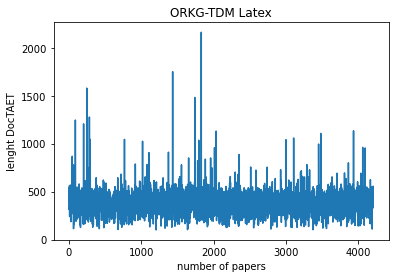

In [64]:
len_latex = get_start_lenght(dict_latex_paper_context, 
                               limit="None",
                                   title="ORKG-TDM Latex", savefig=False)

In [65]:
# path_to_clone = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/pwc_latex_5_10_10000/twofoldwithunk"
new_path = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/PWC_latex_5_10_10000_compare/twofoldwithunk/{fold}"
# new_path = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_ibm_150_5_10_10000_compare/10Neg10000unk/twofoldwithunk/{fold}"
# compare = "_compare"
# new_path_pred = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/PWC_latex_5_10_10000{compare}/10Neg10000unk/twofoldwithunk/{fold}/torch/{model_pth_name}"

os.makedirs(new_path) if not os.path.exists(new_path) else "Pass"
# os.makedirs(new_path_pred) if not os.path.exists(new_path_pred) else "Pass"


                              
train_latex_pd.to_csv(path_or_buf=f"{new_path}/train.tsv", 
                 sep="\t", header=None, index=False)

dev_latex_pd.to_csv(path_or_buf=f"{new_path}/dev.tsv", 
                 sep="\t", header=None, index=False)

# Pred_pd.to_csv(path_or_buf=f"{new_path_pred}/test_results_Bert.tsv", 
#                  sep="\t", header=None, index=False)
# Pred_pd.to_csv(path_or_buf=f"{new_path_pred}/{file_name}", 
#                  sep="\t", header=None, index=False)

# ORKG-Latex vs IBM

In [52]:
# path_to_latex = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/pwc_latex_5_10_10000_clone/twofoldwithunk"
path_to_latex = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/pwc_latex_text/PWC_latex_5_10_10000/twofoldwithunk"
path_to_ibm = f"/nfs/home/kabenamualus/Research/task-dataset-metric-nli-extraction/data/ibm/exp/few-shot-setup/NLP-TDMS/paperVersion"

In [53]:
fold = "fold1"
train_latex_f1_pd = pd.read_csv(f"{path_to_latex}/{fold}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_latex_f1_pd = pd.read_csv(f"{path_to_latex}/{fold}/dev.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

fold = "fold2"
train_latex_f2_pd = pd.read_csv(f"{path_to_latex}/{fold}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_latex_f2_pd = pd.read_csv(f"{path_to_latex}/{fold}/dev.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])


train_published_pd = pd.read_csv(f"{path_to_ibm}/train.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

dev_published_pd = pd.read_csv(f"{path_to_ibm}/test.tsv", 
                    sep="\t", names=["label", "title", "TDM", "Context"])

In [54]:
train_published_pd.tail()

,label,title,TDM,Context
13301,False,16165.pdf,dependency parsing; Penn Treebank; LAS,R 3 : Reinforced Ranker-Reader for Open-Domain...
13302,False,16165.pdf,language modeling; Hutter Prize; Number of params,R 3 : Reinforced Ranker-Reader for Open-Domain...
13303,False,16165.pdf,summarization; CNN / Daily Mail (Non-anonymize...,R 3 : Reinforced Ranker-Reader for Open-Domain...
13304,False,16165.pdf,word sense disambiguation; Senseval 3; F1,R 3 : Reinforced Ranker-Reader for Open-Domain...
13305,False,16165.pdf,text classification; TREC; Error,R 3 : Reinforced Ranker-Reader for Open-Domain...


In [55]:
# train_latex_pd["Len_Context"] = train_latex_pd.Context.apply(lambda x: len(x.split()))
# train_latex_pd = train_latex_pd[train_latex_pd.Len_Context >= 100].drop("Len_Context", axis=1)

# dev_latex_pd["Len_Context"] = dev_latex_pd.Context.apply(lambda x: len(x.split()))
# dev_latex_pd = dev_latex_pd[dev_latex_pd.Len_Context >= 100].drop("Len_Context", axis=1)

# for paper in train_latex_pd.title.unique():
#     train_published_pd[train_published_pd.title==paper]

In [56]:
# List of pdf name that are in the train file
list_train_latex_f1_pd_uniq = list(train_latex_f1_pd.title.unique())
list_train_latex_f2_pd_uniq = list(train_latex_f2_pd.title.unique())
len(list_train_latex_f1_pd_uniq)

2951

In [57]:
# List of pdf name that are in the test file
list_dev_latex_f1_pd_uniq = list(dev_latex_f1_pd.title.unique())
list_dev_latex_f2_pd_uniq = list(dev_latex_f2_pd.title.unique())
len(list_dev_latex_f1_pd_uniq)

1258

In [58]:
# List of pdf name that are in the train file
list_train_published_pd_uniq = list(train_published_pd.title.unique())
len(list_train_published_pd_uniq)

170

In [59]:
# List of pdf name that are in the train file
list_dev_published_pd_uniq = list(dev_published_pd.title.unique())
len(list_dev_published_pd_uniq)

167

In [60]:
# Dict to contains new context
dict_latex_paper_context = {}
for paper in list_train_latex_f1_pd_uniq:
    dict_latex_paper_context[paper] = train_latex_f1_pd[train_latex_f1_pd.title == paper].Context.values[0]
for paper in list_dev_latex_f1_pd_uniq:
    dict_latex_paper_context[paper] = dev_latex_f1_pd[dev_latex_f1_pd.title == paper].Context.values[0]
for paper in list_train_latex_f2_pd_uniq:
    dict_latex_paper_context[paper] = train_latex_f2_pd[train_latex_f2_pd.title == paper].Context.values[0]
for paper in list_dev_latex_f2_pd_uniq:
    dict_latex_paper_context[paper] = dev_latex_f2_pd[dev_latex_f2_pd.title == paper].Context.values[0]
    
dict_published_paper_context = {}
for paper in list_train_published_pd_uniq:
    dict_published_paper_context[paper] = train_published_pd[train_published_pd.title == paper].Context.values[0]
for paper in list_dev_published_pd_uniq:
    dict_published_paper_context[paper] = dev_published_pd[dev_published_pd.title == paper].Context.values[0]

In [69]:
# train_published_pd["Context"] = train_published_pd.apply(lambda x : dict_latex_paper_context[x['title']] if x['title'] in dict_latex_paper_context.keys() else "None", axis=1)
# train_published_pd.drop(train_published_pd.index[train_published_pd['Context'] == 'None'], inplace = True)
# train_published_pd.reset_index(drop=True, inplace=True)
# dev_published_pd["Context"] = dev_published_pd.apply(lambda x : dict_latex_paper_context[x['title']] if x['title'] in dict_latex_paper_context.keys() else "None", axis=1)
# dev_published_pd.drop(dev_published_pd.index[dev_published_pd['Context'] == 'None'], inplace = True)
# dev_published_pd.reset_index(drop=True, inplace=True)

# # train_latex_pd["Context"] = train_latex_pd.apply(lambda x : dict_published_paper_context[x['title']], axis=1)
# # dev_latex_pd["Context"] = dev_latex_pd.apply(lambda x : dict_published_paper_context[x['title']], axis=1)

In [70]:
# # List of pdf name that are in the train file
# list_train_published_pd_uniq = list(train_published_pd.title.unique())
# len(list_train_published_pd_uniq)

In [71]:
# # List of pdf name that are in the train file
# list_dev_published_pd_uniq = list(dev_published_pd.title.unique())
# len(list_dev_published_pd_uniq)

In [48]:
def get_start_lenght(dictionary, limit="150", title="", savefig=False):
    # Stats
    len_context = []
    short_context = 0
    paper_to_short_context = {}
    
    for paper, context in dictionary.items():
        len_context.append(len(context.split()))
        if len(context.split()) <= 100 :
            short_context += 1
            paper_to_short_context[paper] = len(context.split()) 
    
    print(f"Context TDM limit {limit}:")
    print(f"Mean lenght: {np.mean(len_context)}")
    print(f"Max lenght: {np.max(len_context)}")
    print(f"Min lenght: {np.min(len_context)}")
    print(f"Std lenght: {np.std(len_context)}")
    print(f"Lenght paper with context less than 10: {len(paper_to_short_context)}")
    
    x = np.arange(1, len(len_context)+1, 1)
    y = len_context

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel("number of papers")
    plt.ylabel("lenght DocTAET")
    if savefig:
        plt.savefig(fname=re.sub(r"[0-9]+", '', title).strip())
    plt.show()
    
    return paper_to_short_context

In [72]:
# len_published = get_start_lenght(dict_published_paper_context, 
#                                limit="None",
#                                    title="ORKG-TDM Paper Latex", savefig=False)

Context TDM limit 512:
Mean lenght: 309.45103857566767
Max lenght: 546
Min lenght: 81
Std lenght: 93.92587269350176
Lenght paper with context less than 10: 3


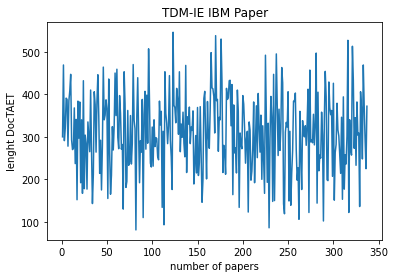

In [46]:
len_published = get_start_lenght(dict_published_paper_context, 
                               limit="512",
                                   title="TDM-IE IBM Paper", savefig=False)

Context TDM limit None:
Mean lenght: 374.7091988130564
Max lenght: 1220
Min lenght: 81
Std lenght: 172.08599311150843
Lenght paper with context less than 10: 3


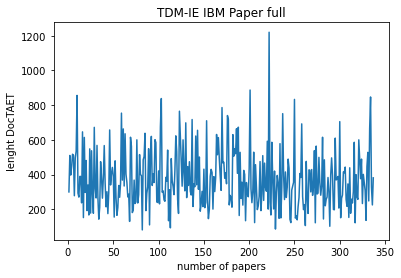

In [18]:
len_published = get_start_lenght(dict_published_paper_context, 
                               limit="None",
                                   title="TDM-IE IBM Paper full", savefig=False)

Context TDM limit None:
Mean lenght: 685.2520788785935
Max lenght: 7374
Min lenght: 100
Std lenght: 442.4167283742035
Lenght paper with context less than 10: 2


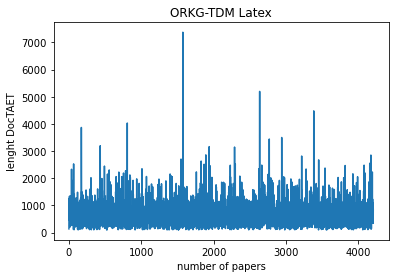

In [17]:
len_latex = get_start_lenght(dict_latex_paper_context, 
                               limit="None",
                                   title="ORKG-TDM Latex", savefig=False)

In [78]:
d = " "
if d:
    print("yes")

yes
